### News Media and Political Attitudes in the United Kingdom
The original research can be referred to the [Pew Research Center](https://www.pewresearch.org/journalism/fact-sheet/news-media-and-political-attitudes-in-the-united-kingdom/)

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle

%matplotlib inline

In [2]:
# read the dataset
data = pd.read_spss('Data/2017_Survey.sav')

In [3]:
# filter the data that are relevant to the UK
uk = data[data['country'] == 'United Kingdom']

#### The first visualisation aims to visualise the overall attitudes of the UK adults towards media.
##### Two subtopics:
- a. the perception of the importance of news media
- b. the trust in news media

In [4]:
# selecting the relevant columns for v1
uk_1 = uk[['Q2d', 'Q3', 'weight']]

In [5]:
# select for the subtopic a
uk_1a = uk_1.drop('Q2d', axis = 1).reset_index(drop = True)

In [6]:
# process data for uk_1a
uk_1a_dummies = pd.get_dummies(uk_1a['Q3']).reset_index(drop = True)

uk_1a = uk_1a.join(uk_1a_dummies)
for column in ['DK/Refused', 'Not at all important', 'Not too important', 'Somewhat important', 'Very important']:
    uk_1a[column] = uk_1a[column]*uk_1a['weight']

uk_1a.drop(['Q3', 'weight'], inplace = True, axis = 1)

uk_1a = pd.DataFrame(uk_1a.sum(axis = 0))
uk_1a.rename(columns={0: 'weighted_count'}, inplace=True)

uk_1a['weighted_proportion'] = uk_1a['weighted_count']/(uk_1a['weighted_count'].sum())*100
uk_1a['weighted_proportion'] = uk_1a['weighted_proportion'].round().astype(int)
uk_1a.drop('weighted_count', axis = 1, inplace = True)

In [7]:
uk_1a.drop('DK/Refused', inplace = True)
uk_1a

,weighted_proportion
Not at all important,6
Not too important,12
Somewhat important,38
Very important,43


In [8]:
# select for the subtopic b
uk_1b = uk_1.drop('Q3', axis = 1).reset_index(drop = True)

In [9]:
# process data for uk_1b
uk_1b_dummies = pd.get_dummies(uk_1b['Q2d']).reset_index(drop = True)

uk_1b = uk_1b.join(uk_1b_dummies)
for column in ['DK/Refused', 'A lot', 'Not at all', 'Not too much', 'Somewhat']:
    uk_1b[column] = uk_1b[column]*uk_1b['weight']

uk_1b.drop(['Q2d', 'weight'], inplace = True, axis = 1)

uk_1b = pd.DataFrame(uk_1b.sum(axis = 0))
uk_1b.rename(columns={0: 'weighted_count'}, inplace=True)

uk_1b['weighted_proportion'] = uk_1b['weighted_count']/(uk_1b['weighted_count'].sum())*100
uk_1b['weighted_proportion'] = uk_1b['weighted_proportion'].round().astype(int)
uk_1b.drop('weighted_count', axis = 1, inplace = True)

In [10]:
# drop the unnecessary row
uk_1b.drop('DK/Refused', inplace = True)

# reorder the df
new_order = ['A lot', 'Somewhat', 'Not too much', 'Not at all']
uk_1b = uk_1b.loc[new_order].reset_index(drop = True)

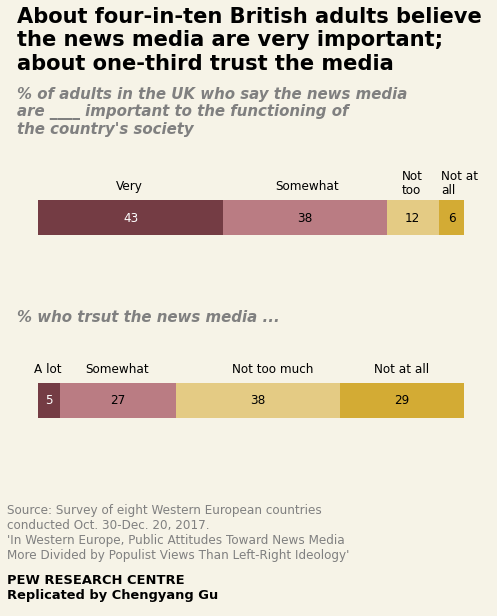

In [11]:
# set up the figure and its style
fig1 = plt.figure(figsize = (7, 10))
fig1.patch.set_facecolor('#f6f3e7')

# define the color for different categories
color_band = ['#743c44', '#ba7c83', '#e4cb84', '#d3ab34']

# add the subplot for the first bar
ax1 = fig1.add_subplot(2, 1, 1)

# draw the first bar
left1 = 0
for proportion, color in zip(reversed(uk_1a['weighted_proportion']), color_band):
    ax1.barh(y = 0, width = proportion, color = color, height = 1, left = left1)
    left1 += proportion

ax1.set_xlim(-7, 105)
ax1.set_ylim(-3, 5)

# the annotation of percentrages inside the bar
left1_text = 0
for value, color in zip(reversed(uk_1a['weighted_proportion']), ['white', 'black', 'black', 'black']):
    text_position = left1_text + value / 2
    ax1.text(text_position, 0, f'{value}', ha='center', va='center', color = color, fontsize=12)
    left1_text += value

# add the text annotation
ax1.text(18, 0.8, 'Very', size = 12)
ax1.text(55, 0.8, 'Somewhat', size = 12)

ax1.text(84.5, 1.1, 'Not', size = 12)
ax1.text(84.5, 0.71, 'too', size = 12)

ax1.text(93.5, 1.1, 'Not at', size = 12)
ax1.text(93.5, 0.71, 'all', size = 12)

ax1.axis('off')

# draw the second bar, same process the the first bar
ax2 = fig1.add_subplot(2, 1, 2)

left2 = 0
for proportion, color in zip(uk_1b['weighted_proportion'], color_band):
    ax2.barh(y = 0, width = proportion, color = color, height = 1, left = left2)
    left2 += proportion

left2_text = 0
for value, color in zip(uk_1b['weighted_proportion'], ['white', 'black', 'black', 'black']):
    text_position = left2_text + value / 2
    ax2.text(text_position, 0, f'{value}', ha='center', va='center', color = color, fontsize=12)
    left2_text += value

ax2.set_xlim(-7, 105)
ax2.set_ylim(-6, 2)

ax2.text(-1, 0.8, 'A lot', size = 12)
ax2.text(11, 0.8, 'Somewhat', size = 12)

ax2.text(45, 0.8, 'Not too much', size = 12)
ax2.text(78, 0.8, 'Not at all', size = 12)

ax2.axis('off')

# add the title and the subtitle
fig1.text(0.04, 0.95, 'About four-in-ten British adults believe\nthe news media are very important;\nabout one-third trust the media', size = 21, weight = 'bold')
fig1.text(0.04, 0.86, "% of adults in the UK who say the news media\nare ____ important to the functioning of\nthe country's society", fontstyle = 'italic', size = 15, weight = 'bold', color = 'gray')

fig1.text(0.04, 0.6, "% who trsut the news media ...", fontstyle = 'italic', size = 15, weight = 'bold', color = 'gray')

# add the source and reference
fig1.text(0.02, 0.27, "Source: Survey of eight Western European countries\nconducted Oct. 30-Dec. 20, 2017.\n'In Western Europe, Public Attitudes Toward News Media\nMore Divided by Populist Views Than Left-Right Ideology'", size = 12, color = 'gray')
fig1.text(0.02, 0.215, "PEW RESEARCH CENTRE\nReplicated by Chengyang Gu", size = 13, weight = 'bold')

# adjust the layout
fig1.tight_layout()
fig1.subplots_adjust(bottom=0.2)

plt.show()

#### The second visualisation aims to present how people with different political inclinations place different media channels on an ideological scale

In [12]:
# selecting the relevant columns
uk_2 = uk[['Q10UKa', 'Q10UKb', 'Q10UKc', 'Q10UKd', 'Q10UKe', 'Q10UKh', 'Q37', 'weight']].reset_index(drop = True)
uk_2 = uk_2.rename(columns = {'Q10UKa': 'BBC',
                              'Q10UKb': 'Sky News',
                              'Q10UKc': 'ITV',
                              'Q10UKd': 'The Guardian',
                              'Q10UKe': 'The Times',
                              'Q10UKh': 'HuffPost',
                              'Q37': 'Ideology'})

In [13]:
# a function to process unnecessary strings
def strip_annotation(a_string):
    result = re.sub(r'\([^)]*\)', '', a_string)
    return result

In [14]:
# preprocess the data
uk_2_weight = uk_2[['weight']]
uk_2_variable = uk_2.drop('weight', axis = 1)

In [15]:
# apply the function to clean unneeded strings
transformed_uk_2 = uk_2_variable.applymap(strip_annotation)

In [16]:
transformed_uk_2

,BBC,Sky News,ITV,The Guardian,The Times,HuffPost,Ideology
0,4,4,4,DK/Refused,DK/Refused,DK/Refused,4
1,3,4,4,0,4,Haven't heard of it,3
2,3,4,3,1,4,3,2
3,6,5,5,6,6,DK/Refused,3
4,2,DK/Refused,3,0,4,DK/Refused,4
...,...,...,...,...,...,...,...
1996,6,6,4,6,6,3,3
1997,4,3,DK/Refused,0,3,DK/Refused,3
1998,3,4,3,2,4,Haven't heard of it,4
1999,3,4,3,2,4,DK/Refused,2


In [17]:
# join the processed df to the weight variable
uk_2 = transformed_uk_2.join(uk_2_weight)

In [18]:
# drop the rows whose responses are not indicative of an ideological inclination
uk_2 = uk_2[(uk_2['Ideology'] != 'Refused ')]
uk_2 = uk_2[(uk_2['Ideology'] != "Don’t know ")]

In [19]:
# transform the ideology variable into int type
uk_2['Ideology'] = uk_2['Ideology'].astype(int)

##### Another cleaning process in required for two major reasons:

- The research includes the (weighted) proportion of regular viewers for a certain channel (at least once a week).
- The original research only considers the ideological inclications and positioning of respondents who are regular viewers of a certain channel (at least once a week)

In [20]:
# selecting the columns about the respondents' frequency of watching a given channel
uk_2_frequency_prop = uk[['Q8UKa', 'Q8UKb', 'Q8UKc', 'Q8UKd', 'Q8UKe', 'Q8UKh', 'weight']].reset_index(drop = True)

uk_2_frequency_prop = uk_2_frequency_prop.rename(columns = {'Q8UKa': 'BBC',
                              'Q8UKb': 'Sky News',
                              'Q8UKc': 'ITV',
                              'Q8UKd': 'The Guardian',
                              'Q8UKe': 'The Times',
                              'Q8UKh': 'HuffPost'})

In [21]:
# preprocess the data
uk_2_frequency_prop_weight = uk_2_frequency_prop[['weight']]
uk_2_frequency_prop_value = uk_2_frequency_prop.drop('weight', axis = 1)

In [22]:
# dummy variable, if a regular viewer then 1 else 0
uk_2_frequency_prop_transformed = uk_2_frequency_prop_value.applymap(lambda x: 1 if x == 'Yes, obtain news from this source at least once a week' else 0)

In [23]:
# join the processed df to the weight variable
uk_2_frequency_prop = uk_2_frequency_prop_transformed.join(uk_2_frequency_prop_weight)

In [24]:
# apply the weight to the original data
for column in ['BBC', 'Sky News', 'ITV', 'The Guardian', 'The Times', 'HuffPost']:
    uk_2_frequency_prop[column] = uk_2_frequency_prop[column]*uk_2_frequency_prop['weight']

In [25]:
# calculated the weighted proportion of regular viewers for a given channel
uk_2_frequency_prop.drop('weight', axis = 1, inplace = True)

uk_2_frequency_prop_weighted = round(uk_2_frequency_prop.sum()/uk_2_frequency_prop.shape[0]*100)
uk_2_frequency_prop_weighted = pd.DataFrame(uk_2_frequency_prop_weighted).rename(columns = {0: 'W/Proportion'})

In [26]:
uk_2_frequency_prop_weighted

,W/Proportion
BBC,92.0
Sky News,44.0
ITV,62.0
The Guardian,29.0
The Times,24.0
HuffPost,18.0


In [27]:
# a function to process data to select the responses by a regular viewer and calculate the proportion of an political positioning score
def process_table(channel_name: str, a_df: pd.DataFrame):
    a_df = a_df[[channel_name, 'weight', channel_name+'_weekly']]
    a_df = a_df[a_df[channel_name+'_weekly'] != 0]

    a_df_weight = a_df['weight'].reset_index(drop = True)
    a_df_value = a_df[[channel_name]]

    a_df_value = pd.get_dummies(a_df_value).reset_index(drop = True)

    a_df_value = a_df_value.join(a_df_weight)

    for column in a_df_value.columns:
        a_df_value[column] = a_df_value[column]*a_df_value['weight']
    
    a_df_value.drop('weight', axis = 1, inplace = True)
    
    return round(a_df_value.sum(axis = 0)/(a_df_value.sum(axis = 0).sum()) * 100).astype(int)

In [28]:
# a function to categorise the data by respondents' ideological inclinations
def left_vs_right(channel_name: str):
    weekly_variable = channel_name + '_weekly'
    uk_2_frequency_prop[weekly_variable] = uk_2_frequency_prop[channel_name]
    df = uk_2.join(uk_2_frequency_prop[weekly_variable])

    df_left = df[df['Ideology'] < 3]
    df_right = df[df['Ideology'] > 3]

    df_left = process_table(channel_name, df_left)
    df_right = process_table(channel_name, df_right)

    df = pd.concat([df_left, df_right], axis = 1)
    df.columns = ['Left', 'Right']

    row_to_drop = channel_name + '_DK/Refused'

    df.drop(row_to_drop, inplace = True)

    return df

In [29]:
# apply the function and store processed df in a dic
dataframes = {}

for channel in uk_2.columns[0: 6]:
    df_name = str(channel)
    dataframes[df_name] = left_vs_right(channel)

In [30]:
# display the dataframes
for name, df in dataframes.items():
    print(name)
    display(df)

BBC


,Left,Right
BBC_0,4,4
BBC_1,1,5
BBC_2,10,9
BBC_3,46,28
BBC_4,21,19
BBC_5,8,16
BBC_6,9,14


Sky News


,Left,Right
Sky News_0,2,0
Sky News_1,4,1
Sky News_2,4,4
Sky News_3,36,33
Sky News_4,30,24
Sky News_5,11,18
Sky News_6,12,16


ITV


,Left,Right
ITV_0,2,1
ITV_1,2,0
ITV_2,12,6
ITV_3,46,40
ITV_4,17,22
ITV_5,6,16
ITV_6,13,11


The Guardian


,Left,Right
The Guardian_0,4,2
The Guardian_1,29,7
The Guardian_2,39,23
The Guardian_3,14,18
The Guardian_4,8,15
The Guardian_5,3,16
The Guardian_6,1,13


The Times


,Left,Right
The Times_0,2,1
The Times_1,1,1
The Times_2,15,3
The Times_3,22,24
The Times_4,41,34
The Times_5,12,20
The Times_6,4,11


HuffPost


,Left,Right
HuffPost_0,3,3
HuffPost_1,12,4
HuffPost_2,36,16
HuffPost_3,38,44
HuffPost_4,5,15
HuffPost_5,1,9
HuffPost_6,0,2


In [31]:
# a function to calcuate the proportion of ideology positioning by category not by score
def ideology_group_par(df: pd.DataFrame):
    left_sum = pd.DataFrame(df.iloc[0:3].sum()).T
    right_sum = pd.DataFrame(df.iloc[4:7].sum()).T
    neutral = pd.DataFrame(df.iloc[3]).T

    result = pd.concat([left_sum, neutral, right_sum], ignore_index = True)

    return result


In [32]:
# apply the function and store the processed df into a dic
dataframes_grouped = {}

for channel in uk_2.columns[0: 6]:
    df_name = str(channel)
    dataframes_grouped[df_name] = ideology_group_par(dataframes[df_name])
    dataframes_grouped[df_name].rename(index = {0: 'Left', 1: 'Center', 2: 'Right'}, inplace = True)


In [33]:
# display the dataframes
for name, df in dataframes_grouped.items():
    print(name)
    display(df)

BBC


,Left,Right
Left,15,18
Center,46,28
Right,38,49


Sky News


,Left,Right
Left,10,5
Center,36,33
Right,53,58


ITV


,Left,Right
Left,16,7
Center,46,40
Right,36,49


The Guardian


,Left,Right
Left,72,32
Center,14,18
Right,12,44


The Times


,Left,Right
Left,18,5
Center,22,24
Right,57,65


HuffPost


,Left,Right
Left,51,23
Center,38,44
Right,6,26


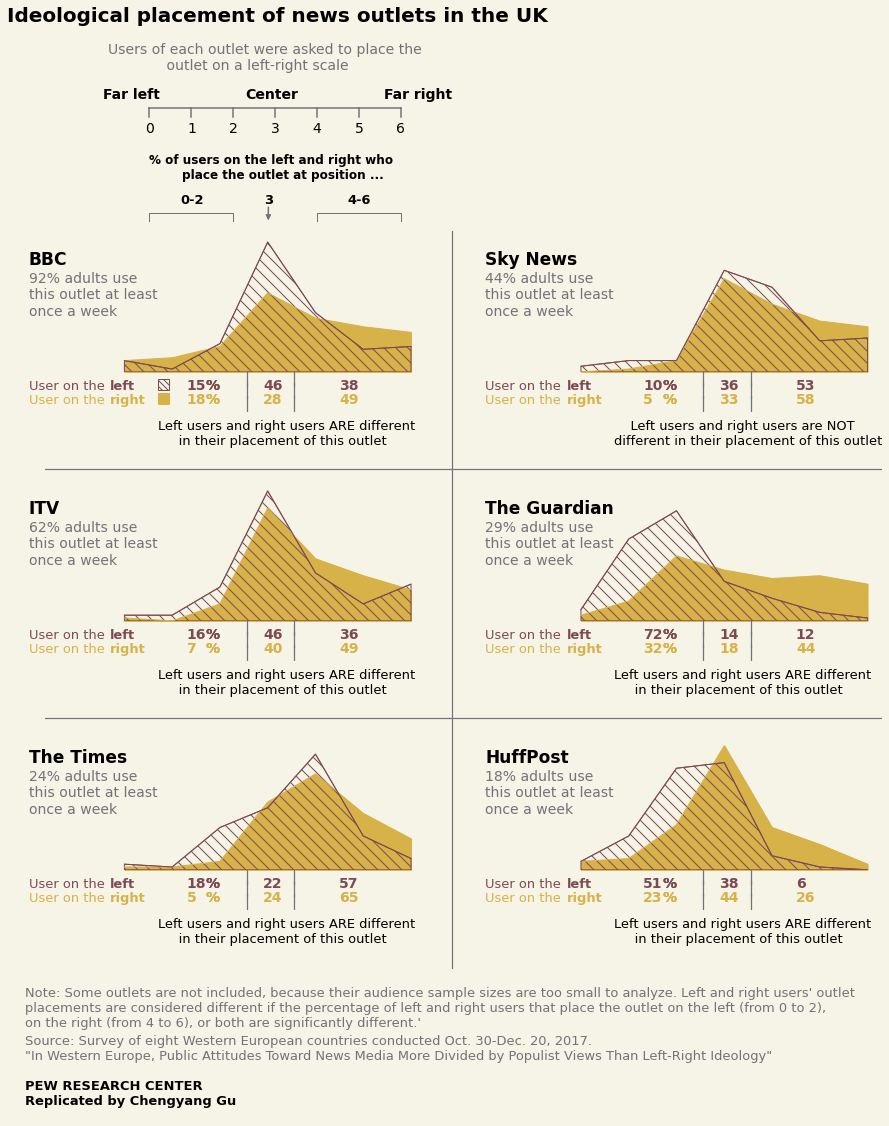

In [34]:
# prepare the figure and its layout
fig2 = plt.figure(figsize = (15, 20))
fig2.patch.set_facecolor('#f6f3e7')
gs = GridSpec(22, 13, figure = fig2)

# add the title subplot
ax1 = fig2.add_subplot(gs[0:4, :])

# add the title and subtitle
ax1.text(-0.02-0.025, 1.05, 'Ideological placement of news outlets in the UK', size = 20, weight = 'bold')
ax1.text(0.1-0.025, 0.8, 'Users of each outlet were asked to place the\n             outlet on a left-right scale', size = 14, color = '#727376')

# draw the spectrum
ax1.axhline(y = 0.6, xmin = 0.15-0.025, xmax = 0.45-0.025, color = '#727376')

ticks = np.linspace(0.15, 0.45, num = 7)
labels = np.arange(0, 7)

for tick, label in zip(ticks, labels):
    ax1.axvline(x = tick-0.025, ymin = 0.55, ymax = 0.6, color = '#727376')
    ax1.text(x = tick-0.03, y = 0.47, s = label, size = 14)

ax1.text(0.07, 0.65, 'Far left', size = 14, weight = 'bold')
ax1.text(0.24, 0.65, 'Center', size = 14, weight = 'bold')
ax1.text(0.405, 0.65, 'Far right', size = 14, weight = 'bold')

ax1.text(0.15-0.025, 0.23, '% of users on the left and right who\n        place the outlet at position ...', size = 12, weight = 'bold')

ax1.axhline(y = 0.05, xmin = 0.15-0.025, xmax = 0.25-0.025, color = '#727376', linewidth = 1)
ax1.axhline(y = 0.05, xmin = 0.35-0.025, xmax = 0.45-0.025, color = '#727376', linewidth = 1)

for x in [0.15, 0.25, 0.35, 0.45]:
    ax1.axvline(x = x-0.025, ymin = 0, ymax = 0.05, color = '#727376', linewidth = 1)

ax1.text(0.187-0.025, 0.1, '0-2', size = 13, weight = 'bold')
ax1.text(0.387-0.025, 0.1, '4-6', size = 13, weight = 'bold')
ax1.text(0.262, 0.1, '3', size = 13, weight = 'bold')

ax1.annotate("", xy = (0.267, 0), xytext = (0.267, 0.09), arrowprops=dict(arrowstyle="-|>", lw=1.5, color='#727376'))

ax1.axis('off')

# add the subplots for the ideology positioning
ax2 = fig2.add_subplot(gs[4:7, 1:6])
ax3 = fig2.add_subplot(gs[4:7, 8:13])
ax4 = fig2.add_subplot(gs[9:12, 1:6])
ax5 = fig2.add_subplot(gs[9:12, 8:13])
ax6 = fig2.add_subplot(gs[14:17, 1:6])
ax7 = fig2.add_subplot(gs[14:17, 8:13])

# draw the ideology plot
for df, ax in zip(dataframes.values(), [ax2, ax3, ax4, ax5, ax6, ax7]):
    right_line, = ax.plot(np.arange(0, 7), df['Right'], color = '#d7b248', linewidth = 1)
    ax.fill_between(np.arange(0, 7), df['Right'], color = '#d7b248', alpha = 1)
    left_line, = ax.plot(np.arange(0, 7), df['Left'], color = '#7d4a54', linewidth = 1)
    ax.fill_between(np.arange(0, 7), df['Left'], facecolor = 'none', hatch = '\\\\', edgecolor = '#7d4a54', interpolate = True)
    ax.set_ylim(0, 50)
    ax.axis('off')

# add the channel names
for label, ax in zip(dataframes.keys(), [ax2, ax3, ax4, ax5, ax6, ax7]):
    ax.text(-2, 38, label, size = 17, weight = 'bold')

# add the percentage of regular viewers as an annotation
for per, ax in zip(uk_2_frequency_prop_weighted['W/Proportion'], [ax2, ax3, ax4, ax5, ax6, ax7]):
    ax.text(-2, 20, f'{per:.0f}% adults use\nthis outlet at least\nonce a week', size = 14, color = '#727376')

# add left vs right annotation
for ax in [ax2, ax3, ax4, ax5, ax6, ax7]:
    ax.text(-2, -6.5, 'User on the', size = 13, color = '#7d4a54')
    ax.text(-0.3, -6.5, 'left', size = 13, weight = 'bold', color = '#7d4a54')
    ax.text(-2, -11.5, 'User on the', size = 13, color = '#d7b248')
    ax.text(-0.3, -11.5, 'right', size = 13, weight = 'bold', color = '#d7b248')

# add the separation lines between left/right and neutral
for ax in [ax2, ax3, ax4, ax5, ax6, ax7]:
    ax.text(2.5, -4, '|', size = 15, color = '#727376')
    ax.text(3.5, -4, '|', size = 15, color = '#727376')
    ax.text(2.5, -8, '|', size = 15, color = '#727376')
    ax.text(3.5, -8, '|', size = 15, color = '#727376')
    ax.text(2.5, -12.7, '|', size = 15, color = '#727376')
    ax.text(3.5, -12.7, '|', size = 15, color = '#727376')

# add the left percentage annotation
for df, ax in zip(dataframes_grouped.values(), [ax2, ax3, ax4, ax5, ax6, ax7]):
    for i, j in zip(df['Left'], [1.3, 2.9, 4.5]):
        ax.text(j, -6.5, i, size = 14, color = '#7d4a54', weight = 'bold')
        ax.text(1.7, -6.5, '%', size = 14, color = '#7d4a54', weight = 'bold')

# add the right percentage annotation
for df, ax in zip(dataframes_grouped.values(), [ax2, ax3, ax4, ax5, ax6, ax7]):
    for i, j in zip(df['Right'], [1.3, 2.9, 4.5]):
        ax.text(j, -11.5, i, size = 14, color = '#d7b248', weight = 'bold')
        ax.text(1.7, -11.5, '%', size = 14, color = '#d7b248', weight = 'bold')

# add the insight annotation
for ax in [ax2, ax4, ax5, ax6, ax7]:
    ax.text(0.7, -26, 'Left users and right users ARE different\n     in their placement of this outlet', size = 13)

ax3.text(0.7, -26, '    Left users and right users are NOT\ndifferent in their placement of this outlet', size = 13)

# add the subplot for annotation and reference
ax8 = fig2.add_subplot(gs[19:22, :])

ax8.text(-0.024, 0.65, "Note: Some outlets are not included, because their audience sample sizes are too small to analyze. Left and right users' outlet\nplacements are considered different if the percentage of left and right users that place the outlet on the left (from 0 to 2),\non the right (from 4 to 6), or both are significantly different.'",
         size = 13, color = '#727376')
ax8.text(-0.024, 0.42, "Source: Survey of eight Western European countries conducted Oct. 30-Dec. 20, 2017.\n\"In Western Europe, Public Attitudes Toward News Media More Divided by Populist Views Than Left-Right Ideology\"",
         size = 13, color = '#727376')

ax8.text(-0.024, 0.1, 'PEW RESEARCH CENTER\nReplicated by Chengyang Gu', size = 13, weight = 'bold')

ax8.axis('off')

# add the subplots for dividing lines between line plots
ax9 = fig2.add_subplot(gs[8, :])
ax10 = fig2.add_subplot(gs[13, :])
ax11 = fig2.add_subplot(gs[4:19, 6])

# draw the horizontal lines
for ax in [ax9, ax10]:
    ax.axhline(y = 0.07, xmin = 0, xmax = 1, color = '#727376', linewidth = 1.2)
    ax.axis('off')

# draw the vertical lines
ax11.axvline(x = 0.3, ymin = 0, ymax = 1, color = '#727376', linewidth = 1.2)
ax11.axis('off')

# add squares as a legend for line plots
# size of each square
square_size = (0.01, 0.0077)  # Adjust the size as needed
# position of each square
left_square_position = (0.23, 0.6312)
right_square_position = (0.23, 0.6212)  # Slightly below the first square

# add squares to the figure,
left_square = Rectangle(left_square_position, *square_size, transform=fig2.transFigure, edgecolor='#7d4a54', facecolor='none', hatch = '\\\\\\\\')
right_square = Rectangle(right_square_position, *square_size, transform=fig2.transFigure, edgecolor='#d7b248', facecolor='#d7b248')

fig2.patches.extend([left_square, right_square])

plt.show()